In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm, LinearSegmentedColormap
import matplotlib as mpl
from datetime import datetime, timedelta
import calendar

In [10]:
def get_data(sector_dict, start_date, end_date):
    start_date = datetime.strptime(start_date, '%Y-%m-%d')
    end_date = datetime.strptime(end_date, '%Y-%m-%d') + timedelta(days=1)

    data = {}
    for sector, name in sector_dict.items():
        ticker = yf.Ticker(sector)
        hist = ticker.history(start=start_date, end=end_date)
        first_open = hist['Open'].iloc[0]
        last_close = hist['Close'].iloc[-1]
        first_open_date = hist.index[0].date()
        last_close_date = hist.index[-1].date()
        weekly_return = (last_close - first_open) / first_open
        data[name] = weekly_return
        print(f'Ticker: {sector}, Sector: {name}, First Open: {first_open:.2f} on {first_open_date}, Last Close: {last_close:.2f} on {last_close_date}, Return: {weekly_return:.2%}')  # Debug print
    return data

def get_sp500_data(start_date, end_date):
    start_date = datetime.strptime(start_date, '%Y-%m-%d')
    end_date = datetime.strptime(end_date, '%Y-%m-%d') + timedelta(days=1)

    ticker = yf.Ticker('^GSPC')  # S&P 500
    hist = ticker.history(start=start_date, end=end_date)
    first_open = hist['Open'].iloc[0]
    last_close = hist['Close'].iloc[-1]
    first_open_date = hist.index[0].date()
    last_close_date = hist.index[-1].date()
    weekly_return = (last_close - first_open) / first_open
    print(f'Ticker: ^GSPC, First Open: {first_open} on {first_open_date}, Last Close: {last_close} on {last_close_date}, Return: {weekly_return*100:.2f}%')  # Debug print
    return weekly_return

def prepare_data_frame(data):
    df = pd.DataFrame.from_dict(data, orient='index', columns=['Return'])
    df.index.name = 'Sector'
    df = df.reset_index()
    df.sort_values(by='Return', inplace=True)
    df.reset_index(drop=True, inplace=True)  
    return df

In [37]:
def plot_data(df, start_date, end_date, title_format='weekly'):
    max_abs_return = max(abs(df['Return'].min()), df['Return'].max())
    colors = ["red", "white", "green"]
    cmap = LinearSegmentedColormap.from_list("", colors)
    norm = TwoSlopeNorm(vcenter=0, vmin=-max_abs_return, vmax=max_abs_return)
    bar_colors = cmap(norm(df['Return'].values))

    with plt.style.context('dark_background'):
        fig, ax = plt.subplots(figsize=(10, 6))
        bars = ax.barh(df['Sector'], df['Return'], color=bar_colors)
        ax.axis('off')

        padding = max_abs_return * 0.05  # dynamic padding

        for i, v in enumerate(df['Return']):
            if df.loc[i, 'Sector'] == 'S&P 500':
                fontweight = 'bold'
                color = 'lightcyan'
            else:
                fontweight = 'normal'
                color = 'grey'
            
            if v < 0:
                ax.text(v - padding, i, '-{:,.2%}'.format(abs(v)), color=color, va='center', ha='right', fontsize=12, fontweight=fontweight)
                ax.text(padding, i, df.loc[i, 'Sector'], color=color if fontweight == 'bold' else 'thistle', va='center', ha='left', fontsize=14, fontweight=fontweight)
            else:
                ax.text(v + padding, i, '{:,.2%}'.format(v), color=color, va='center', ha='left', fontsize=12, fontweight=fontweight)
                ax.text(-padding, i, df.loc[i, 'Sector'], color=color if fontweight == 'bold' else 'thistle', va='center', ha='right', fontsize=14, fontweight=fontweight)

        if title_format == 'weekly':
            title = f'S&P 500 Sector Returns for the Week of {start_date} to {end_date}'
        elif title_format == 'monthly':
            month_name = calendar.month_name[datetime.strptime(end_date, '%Y-%m-%d').month]
            year = datetime.strptime(end_date, '%Y-%m-%d').year
            title = f'S&P 500 Sector Returns for the Month of {month_name}, {year}'
        elif title_format == 'ytd':
            year = datetime.strptime(end_date, '%Y-%m-%d').year
            title = f'S&P 500 Sector Returns for the Year to Date, {year}'

        plt.title(title, color='lightsteelblue', fontsize=16)
        plt.tight_layout()
        plt.show()


In [38]:
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans',
                               'Lucida Grande', 'Verdana']

sector_dict = {
    'XLC': 'Communication Services',
    'XLY': 'Consumer Discretionary',
    'XLP': 'Consumer Staples',
    'XLE': 'Energy',
    'XLF': 'Financials',
    'XLI': 'Industrials',
    'XLB': 'Materials',
    'XLV': 'Health Care',
    'XLRE': 'Real Estate',
    'XLK': 'Technology',
    'XLU': 'Utilities'
}


In [39]:
start_date = '2023-06-25'
end_date = '2023-06-30'

In [40]:
data = get_data(sector_dict, start_date, end_date)
data['S&P 500'] = get_sp500_data(start_date, end_date)

df = prepare_data_frame(data)

Ticker: XLC, Sector: Communication Services, First Open: 63.96 on 2023-06-26, Last Close: 65.08 on 2023-06-30, Return: 1.75%
Ticker: XLY, Sector: Consumer Discretionary, First Open: 164.44 on 2023-06-26, Last Close: 169.81 on 2023-06-30, Return: 3.27%
Ticker: XLP, Sector: Consumer Staples, First Open: 73.78 on 2023-06-26, Last Close: 74.17 on 2023-06-30, Return: 0.53%
Ticker: XLE, Sector: Energy, First Open: 77.50 on 2023-06-26, Last Close: 81.17 on 2023-06-30, Return: 4.74%
Ticker: XLF, Sector: Financials, First Open: 32.69 on 2023-06-26, Last Close: 33.71 on 2023-06-30, Return: 3.12%
Ticker: XLI, Sector: Industrials, First Open: 103.24 on 2023-06-26, Last Close: 107.32 on 2023-06-30, Return: 3.95%
Ticker: XLB, Sector: Materials, First Open: 79.89 on 2023-06-26, Last Close: 82.87 on 2023-06-30, Return: 3.73%
Ticker: XLV, Sector: Health Care, First Open: 131.67 on 2023-06-26, Last Close: 132.73 on 2023-06-30, Return: 0.81%
Ticker: XLRE, Sector: Real Estate, First Open: 35.85 on 2023-06

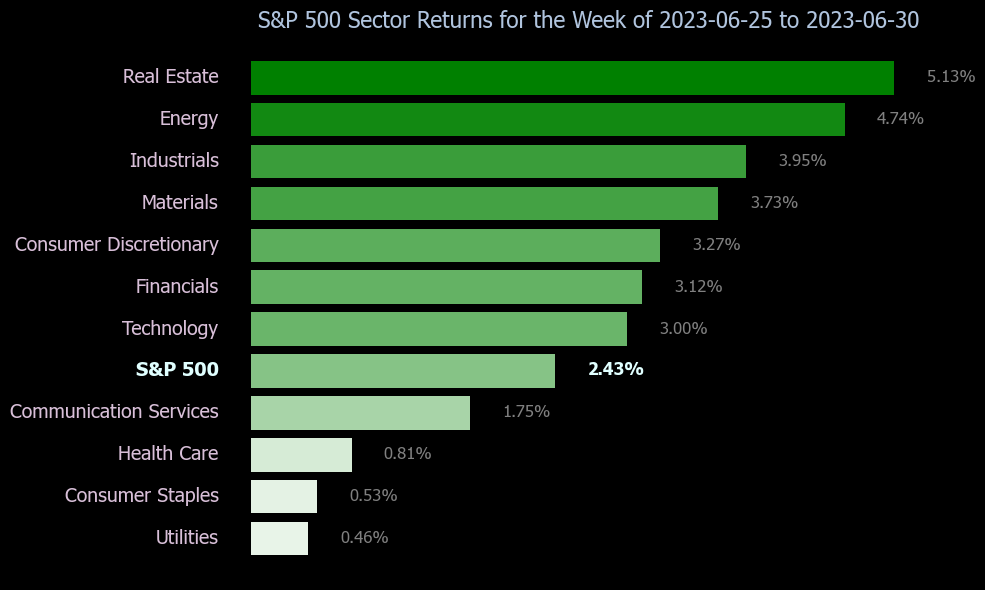

In [41]:
plot_data(df, start_date, end_date)

In [42]:
data

{'Communication Services': 0.01751098753304908,
 'Consumer Discretionary': 0.03265625782936213,
 'Consumer Staples': 0.005285977176755847,
 'Energy': 0.04735481508316532,
 'Financials': 0.031202217822373732,
 'Industrials': 0.039519584613305195,
 'Materials': 0.03730133157717511,
 'Health Care': 0.008050410673156316,
 'Real Estate': 0.05132497157332168,
 'Technology': 0.029976288312283043,
 'Utilities': 0.004605512044347467,
 'S&P 500': 0.024290892842533215}

In [ ]:
start_date = '2023-06-01'
end_date = '2023-06-30'

data = get_data(sector_dict, start_date, end_date)
data['S&P 500'] = get_sp500_data(start_date, end_date)

df = prepare_data_frame(data)

plot_data(df, start_date, end_date, title_format='monthly')

Ticker: XLC, Sector: Communication Services, First Open: 62.32 on 2023-06-01, Last Close: 65.08 on 2023-06-30, Return: 4.43%
Ticker: XLY, Sector: Consumer Discretionary, First Open: 151.18 on 2023-06-01, Last Close: 169.81 on 2023-06-30, Return: 12.33%
Ticker: XLP, Sector: Consumer Staples, First Open: 72.14 on 2023-06-01, Last Close: 74.17 on 2023-06-30, Return: 2.82%
Ticker: XLE, Sector: Energy, First Open: 76.10 on 2023-06-01, Last Close: 81.17 on 2023-06-30, Return: 6.66%
Ticker: XLF, Sector: Financials, First Open: 31.80 on 2023-06-01, Last Close: 33.71 on 2023-06-30, Return: 6.02%


In [ ]:
start_date = '2023-01-01'
end_date = '2023-06-30'

data = get_data(sector_dict, start_date, end_date)
data['S&P 500'] = get_sp500_data(start_date, end_date)

df = prepare_data_frame(data)

plot_data(df, start_date, end_date, title_format='ytd')